In [192]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100                                   # 데이터의 수
K = 3                                         # 분포 수

T3 = np.zeros((3, N), dtype=np.uint8)
X  = np.zeros((2, N))

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  #  분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])        #  분포의 분산
Pi  =  np.array([0.4, 0.8, 1])                             # (A) 각 분포에 대한 비율 0.4 0.8 1

for i in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[k, i] = 1
            break
    for k in range(2):
        X[k, i] = (np.random.randn() * Sig[T3[:, i] == 1, k] + Mu[T3[:, i] == 1, k])

In [3]:
def  logistic3(x, w):
    w = w.reshape((3, 3))
    x = np.array([x[0], x[1], np.ones_like(x[0])]) # shape(3,5)
    y = np.exp(w.dot(x)) # shape(3,3) X shape(3,5) = shape(3,5)
    wk = np.sum(y, axis=0) # shape(5)
    
    return y / wk # # shape(3,5)/shape(5) = shape(3,5)


# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:,:5], W)
print(np.round(y, 3))

[[0.    0.965 0.925 0.    0.019]
 [0.006 0.033 0.07  0.    0.126]
 [0.994 0.001 0.005 1.    0.856]]


In [126]:
a = np.array(range(1,5)).reshape(2,2)
np.log(a)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [196]:
def cee_logistic3(w, x, t): # shape(3,3), shape(2,-1), shape(3,-1)
    K, N = t.shape
    x_n = x.shape[1] # 데이터 갯수
    y = logistic3(x, w) # shape(3, -1)
    
#     print((-t * np.log(y))[0,1])
#     print(-t[0,1] * np.log(y[0,1]))
#     print(-t[0,1])
#     print(t[0,1])
    
#     cccc = []
#     tot_cee = 0
#     for k in range(K):
#         ccc = []
#         for n in range(N):
#             tot_cee -= t[k, n] * np.log(y[k, n])
#             ccc.append( - (t[k, n] * np.log(y[k, n])))
#         cccc.append(ccc)
#     print(np.array(cccc))
    
#     aa = - (t * np.log(y))
    tot_cee = np.sum(- (t * np.log(y)))
#     print(aa)
    return tot_cee / x.shape[1] # 오차 평균

# 교차 엔트로피 오차의 미분 

def dcee_logistic3(w, x, t): # shape(3,3), shape(2,-1), shape(3,-1)
    X_n = x.shape[1]
    y = logistic3(x, w) # shape(3,-1)
    x = np.array([x[0], x[1], np.ones_like(x[0])]) # shape(3,-1)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)

    K, N = y.shape
    for n in range(N):
        aa = np.matrix(t[:,n]-y[:,n]).T
        bb = np.matrix(x[:,n])
        dcee -= aa.dot(bb)
    
    dcee = (dcee / X_n)
    return dcee.flatten()

In [161]:
w = np.arange(9)
x = np.array(range(50)).reshape(2,25)
t = np.array([1,0,0,0,1,0,1,0,0,0,1,0,0,0,1]*5).reshape(3,25)

In [174]:
print(X[:,:5])
print(T3[:,:5])

[[-0.14173827 -0.86972023 -2.15442802  0.75523128 -1.10193462]
 [ 0.86533666 -1.25107804  0.29474174  0.92518889  0.74082534]]
[[0 1 1 0 1]
 [1 0 0 1 0]
 [0 0 0 0 0]]


In [197]:
cee_logistic3(W,X[:,:5],T3[:,:5])

0.13036885654166125

In [138]:
cee_logistic3(w,x,t)

[36.00000001522998, 0.0, 0.0, 0.0, 84.0, 0.0, 24.00000000003775, 0.0, 0.0, 0.0, 1.522997994880762e-08, 0.0, 0.0, 0.0, -0.0]


28.800000006099538

In [100]:
dcee_logistic3(w,x,t)

28.800000006099538


array([-0.8       , -2.8       , -0.4       , -0.2       , -1.19999998,
       -0.2       ,  1.2       ,  4.19999998,  0.6       ])

In [101]:
# 매개 변수 검색

def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method='CG')
    return res.x

# 모델 등고선 2D 표시
def show_contour_logistic3(w):
    xn = 30 
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    xx = np.r_[[xx0],[xx1]]
    print(xx.shape)
    y = np.zeros((3, xn, xn))
    for i in range(xn):
#         wk = logistic3(xx0[:, i], xx1[:, i], w)
        wk = logistic3(xx[:,:,i], w)
        for j in range(3):
            y[j, :, i] = wk[j, :]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[j, :, :],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)
    
def show_data2(x, t):
    K, wk = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[0, t[k, :] == 1], x[1, t[k, :] == 1],  linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
        plt.grid(True)

In [35]:
a = np.array([[1,2],[3,4]])
a = a.reshape(-1,-1,1)
a.shape

ValueError: can only specify one unknown dimension

In [86]:
print(X.shape)
print(T3.shape)

(2, 100)
(3, 100)


In [108]:
# from scipy.optimize import minimize


# X_range0 = [-3, 3] # X0 범위 표시 용
# X_range1 = [-3, 3] # X1의 범위 표시 용

# # 테스트
# W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
# dcee_out = dcee_logistic3(W, X, T3)
# print('\t dcee_out = \n' ,dcee_out)

# # 메인
# W_init = np.zeros((3, 3))
# W = fit_logistic3(W_init, X, T3)
# print('\t W = \n',np.round(W.reshape((3, 3)),2))
# cee = cee_logistic3(W, X, T3)
# print("CEE = {0:.2f}".format(cee))

# plt.figure(figsize=(5, 5))

# show_contour_logistic3(W)
# show_data2(X, T3)

# plt.show()

	 dcee_out = 
 [ 0.03778433  0.03708109 -0.1841851  -0.21235188 -0.44408101 -0.38340835
  0.17456754  0.40699992  0.56759346]
	 W = 
 [[-2.37 -1.91  1.32]
 [-0.02  3.32 -0.39]
 [ 2.39 -1.41 -0.92]]
CEE = 0.24
(2, 30, 30)


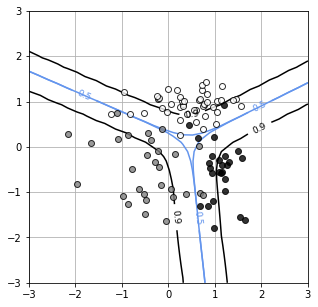

In [198]:
# from scipy.optimize import minimize


X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용

# 테스트
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_out = dcee_logistic3(W, X, T3)
print('\t dcee_out = \n' ,dcee_out)

# 메인
W = np.zeros((9,))
for i in range(100):
    W -= dcee_logistic3(W, X, T3)
#     print(cee_logistic3(W,X,T3))
    
print('\t W = \n',np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(5, 5))

show_contour_logistic3(W)
show_data2(X, T3)

plt.show()